## Problem Statement

### Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.

Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Dictionary:

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

1. case_id: ID of each visa application
2. continent: Information of continent the employee
3. education_of_employee: Information of education of the employee
4. has_job_experience: Does the employee has any job experience? Y = Yes; N = No
5. requires_job_training: Does the employee require any job training? Y = Yes; N = No
6. no_of_employees: Number of employees in the employer's company
7. yr_of_estab: Year in which the employer's company was established
8. region_of_employment: Information of foreign worker's intended region of employment in the US.
9. prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
10. unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
11. full_time_position: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
12. case_status: Flag indicating if the Visa was certified or denied

## Importing the necessary libraries

In [70]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    ConfusionMatrixDisplay,
    classification_report
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [71]:
EasyVisa = pd.read_csv("EasyVisa.csv")

In [72]:
# Making a copy of the dataset to avoid changes to the original
data = EasyVisa.copy()

In [73]:
#Viewing the first 5 rows of the dataset
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [74]:
#Viewing the last 5 rows of the dataset
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


In [75]:
#Understand the shape of the dataset.
data.shape

(25480, 12)

#### Observation 
* The dataset has 25480 rows and 12 columns.

In [76]:
#Check the data types of the columns for the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### Observation 
1. case_id, continent, education_of_employe, has_job_experience , requires_job_training, region_of_employment, unit_of_wage, full_time_positio and case_status are of object type.
2. no_of_employees and yr_of_esta are of integer type.
3. prevailing_wage is of float type.

In [77]:
# Checking for missing values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### Observation 
* There are no null values in the dataset

In [78]:
# checking for duplicate values
data.duplicated().sum()

0

#### Observation 
* There are no duplicate values in the data.

In [79]:
# Statistical summary of the data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.000,NaN,NaN,NaN,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,NaN,NaN,NaN,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.000,NaN,NaN,NaN,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observation

##### Numerical columns

1. no_of_employees:
   * Mean = 5667 - Avg no.of employees
   * SD = 22877 - Seem to have large variance
   * Min = -26  - Invalid value as no.of of employees cannot be a negative vale
2. yr_of_estab:
   * Mean = 1979 - Avg establishment year
   * SD = 42
   * Min = 1800 - Opportunity to check as the year seem to be too old
3. prevailing_wage:
   * Mean = 74455 USD - Avg wage provided
   * SD = 52815 USD - Seem to have large variance
   * Min = 2 USD - Need to verify as the min wage looks too less

##### Categorical columns
1. Case ID is all unique values - Will not be used in EDA as its similar to index with no predictive value.
2. Continent - 6 unique values. Asia is most common(16,861 values)
3. education_of_employee - 4 categories. Most common is Bachelor's(10,234 records)
4. has_job_experience - Binary (Y/N), majority have job experience: Y (14,802 records).
5. requires_job_training - Binary (Y/N), most don’t require training: N (22,525 records).
6. region_of_employment - 5 unique regions, most common is Northeast (7,195 records).
7. unit_of_wage - 4 wage units, most common is Year (22,962 records)
8. full_time_position - Binary (Y/N). Most have full time jobs (22,773 records) 
9. case_status - Binary (Y/N). Most have are Certified  (17,018 records) 

### Printing the number of occurrences of each unique value in each column

In [80]:
# list of all categorical variables
cat_col = data.columns

In [81]:
for column in cat_col:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

case_id
EZYV01      0.000
EZYV16995   0.000
EZYV16993   0.000
EZYV16992   0.000
EZYV16991   0.000
             ... 
EZYV8492    0.000
EZYV8491    0.000
EZYV8490    0.000
EZYV8489    0.000
EZYV25480   0.000
Name: proportion, Length: 25480, dtype: float64
--------------------------------------------------
continent
Asia            0.662
Europe          0.146
North America   0.129
South America   0.033
Africa          0.022
Oceania         0.008
Name: proportion, dtype: float64
--------------------------------------------------
education_of_employee
Bachelor's    0.402
Master's      0.378
High School   0.134
Doctorate     0.086
Name: proportion, dtype: float64
--------------------------------------------------
has_job_experience
Y   0.581
N   0.419
Name: proportion, dtype: float64
--------------------------------------------------
requires_job_training
N   0.884
Y   0.116
Name: proportion, dtype: float64
--------------------------------------------------
no_of_employees
183     0.001
854 

#### Checking case_id column for unique values

In [82]:
data.case_id.nunique()

25480

#### Observation:
* case_id column is similar to index
* Therefore we will not use this column in our EDA
* Will handle this column later at the Feature Engineering section.

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

In [83]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [84]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [85]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [86]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Univariate Analysis

### Categorical Variables		


**Plotting for:** `continent`

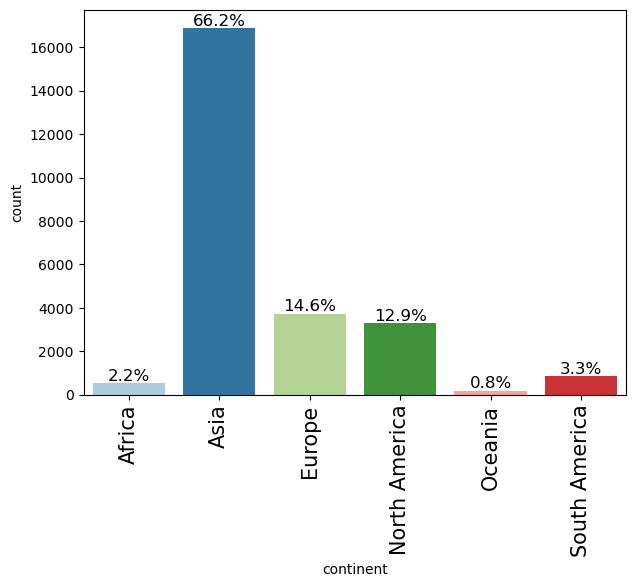

**Plotting for:** `education_of_employee`

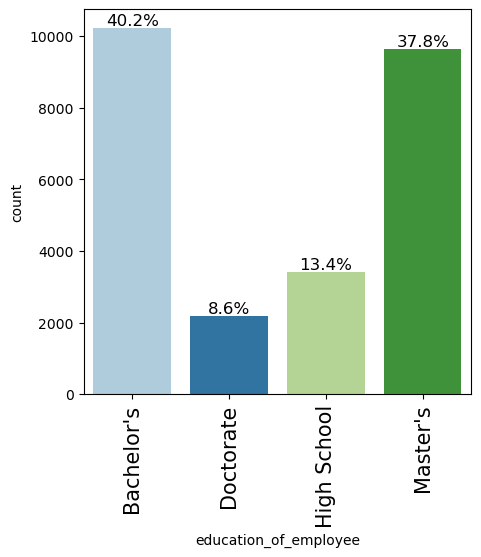

**Plotting for:** `has_job_experience`

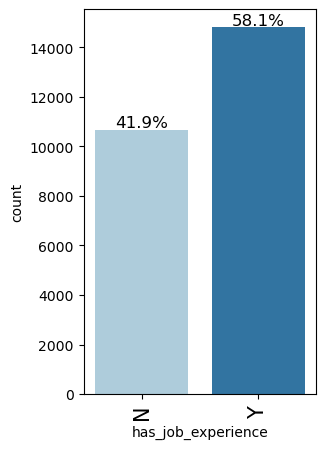

**Plotting for:** `requires_job_training`

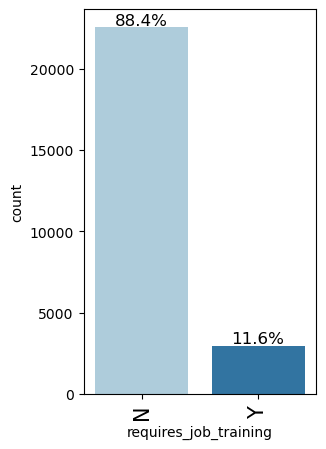

**Plotting for:** `region_of_employment`

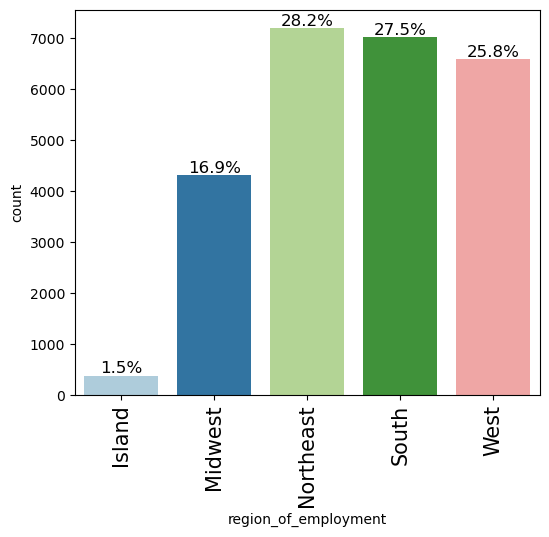

**Plotting for:** `unit_of_wage`

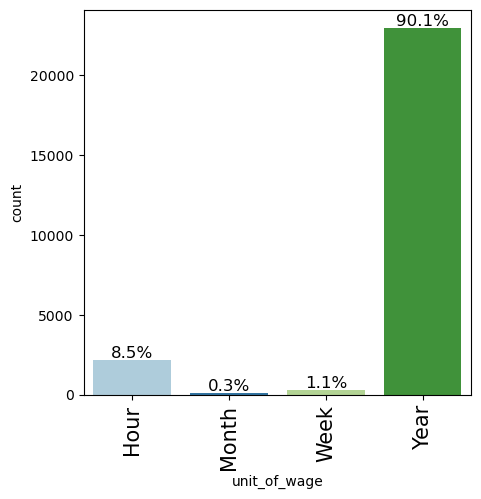

**Plotting for:** `full_time_position`

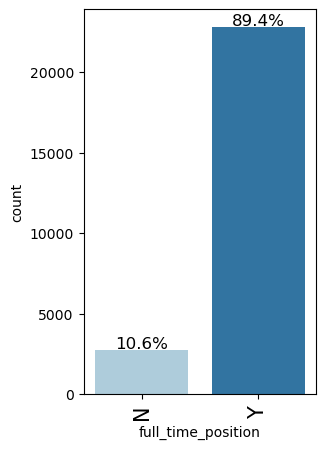

**Plotting for:** `case_status`

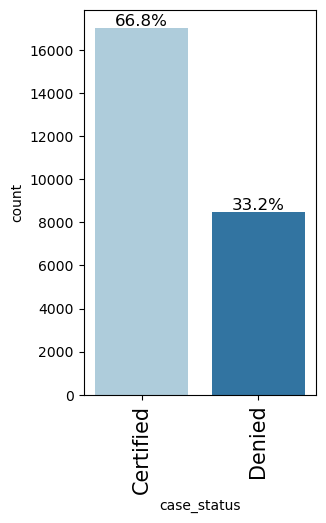

In [87]:
cat_cols = [
    'continent',
    'education_of_employee',
    'has_job_experience',
    'requires_job_training',
    'region_of_employment',
    'unit_of_wage',
    'full_time_position',
    'case_status',
]

for col in cat_cols:
    display(Markdown(f"**Plotting for:** `{col}`"))
    labeled_barplot(data, feature=col, perc=True)

#### Observations for the Univariate analysis - Categorical columns:

1. continent :
    * Dataset is heavily skewed towards to Asia with 66.2% of data have Asia as continent
    * Europe and North America have 14.6% and 12.9% of data respectively
    * Africa, South America and Oceania have very less % of data
--------------------------------------------------------------------------------------------------------------
2. education_of_employee :
   * 40.2% of employess have a Bachelor's degree
   * 37.8% of employess have Master's degree
   * Highschool and Doctorate combined have 22% of employess in the dataset
--------------------------------------------------------------------------------------------------------------
3. has_job_experience :
   * 58.1% of employess have job experience
   * 41.9% of employess have no job experience
--------------------------------------------------------------------------------------------------------------
4. requires_job_training :
   * 88.4% of employees DONOT require job training
   * 11.6% of employess require job training
   * Denotes skilled labour force
--------------------------------------------------------------------------------------------------------------
5. region_of_employment :
   * Northeast (28.2%) has the highest employment share among all regions.
   * Northeast is the largest employment region, followed by South and West.
   * The Island region has very low representation and may have limited influence in analysis.
--------------------------------------------------------------------------------------------------------------
6. unit_of_wage :
   * Yearly wage is the most common unit, comprising 90.1% of the dataset.
   * Hourly wages make up 8.5%.
   * Weekly and monthly units are rare (1.1% and 0.3% respectively).
--------------------------------------------------------------------------------------------------------------
7. full_time_position:
   * A large majority (89.4%) of positions are full-time (Y).
   * Only 10.6% are not full-time (N).
--------------------------------------------------------------------------------------------------------------
8. Case_status :
   * Certified cases account to 66.8% of the total
   * Denied cases are 33.2 %

### Numerical Variables

### 1. no_of_employees

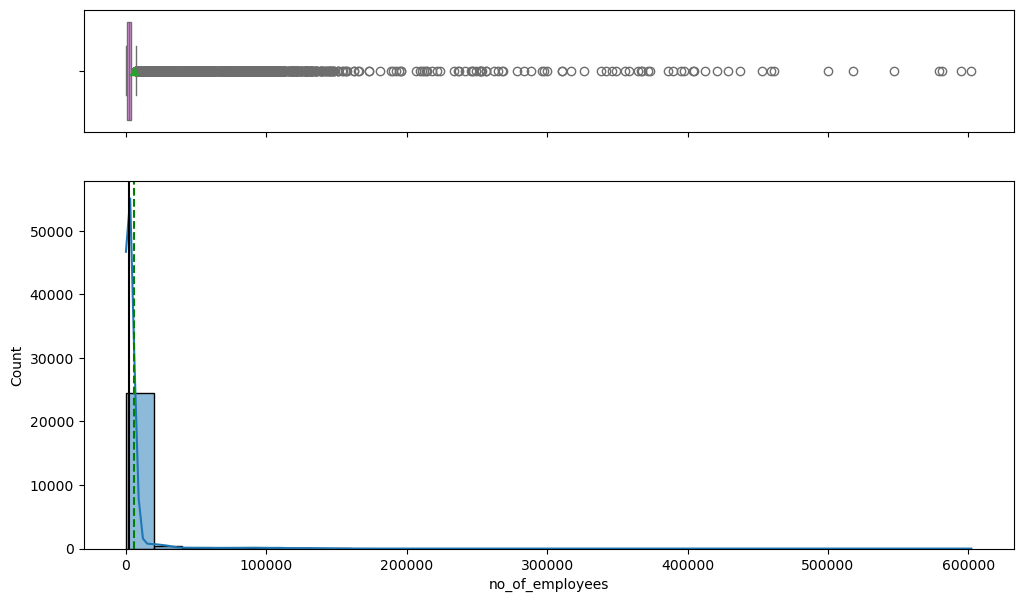

In [88]:
histogram_boxplot(data, "no_of_employees",kde=True, bins=30)

#### Observations:
1. Right skewed distribution
2. The long tail denotes there are few companies with very large employee count
3. Most companies have less than 10,000 employees
4. Outliers noticed

### 2. yr_of_estab

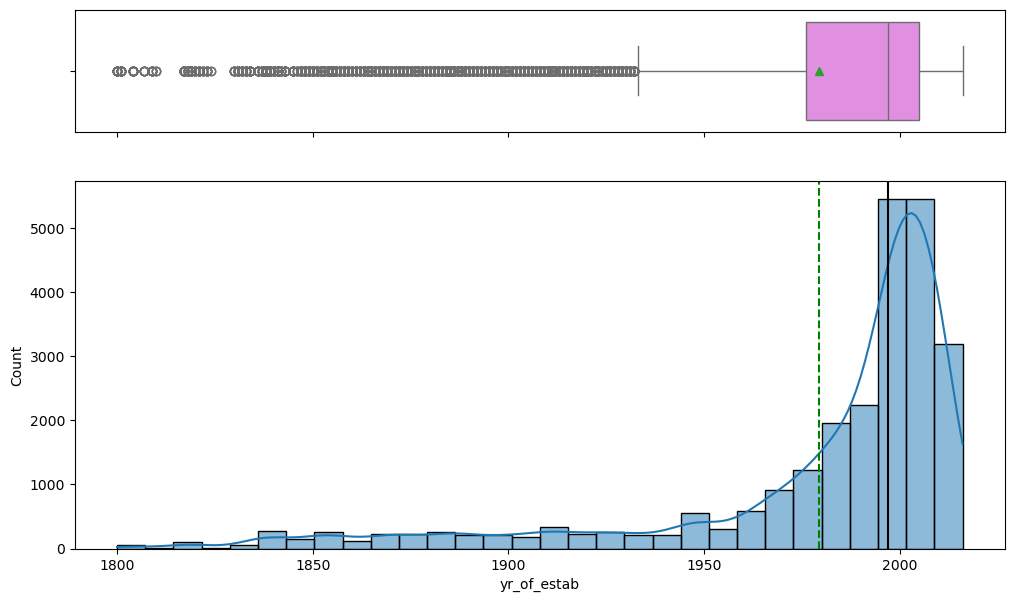

In [89]:
histogram_boxplot(data, "yr_of_estab",kde=True, bins=30)

#### Observations:
1. The dataset includes organizations with a very wide age range, from 1800s to the 2010s.
2. Most organizations were founded in the last 50 years, specifically between 1970 and 2015.
3. Outliers noticed
4. Distributiis left on ske.ght

### 3. prevailing_wage

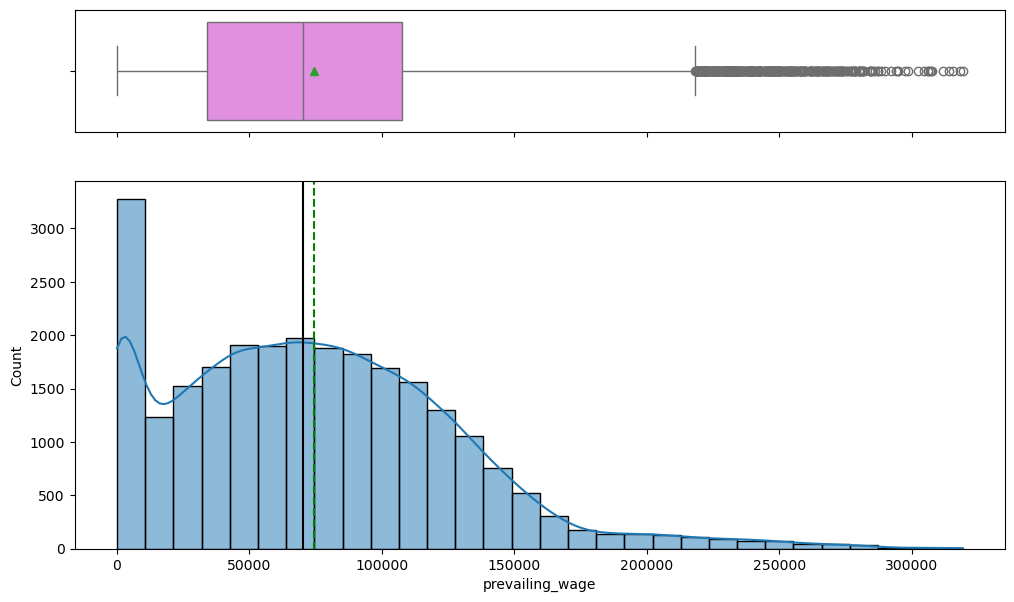

In [90]:
histogram_boxplot(data, "prevailing_wage",kde=True, bins=30)

#### Observations:
1. Data shows not a normal distribution
2. Outliers are noticed
3. Right skewed distribution
4. Mean appears to be around $70K

## Bivariate Analysis

#### Let's analyze the relation between case_status and other variables. This would tell us how the data performs for customers who had already been certified Visa earlier

#### Numerical Feature vs Target (case_status)

**Plotting for:** `prevailing_wage`

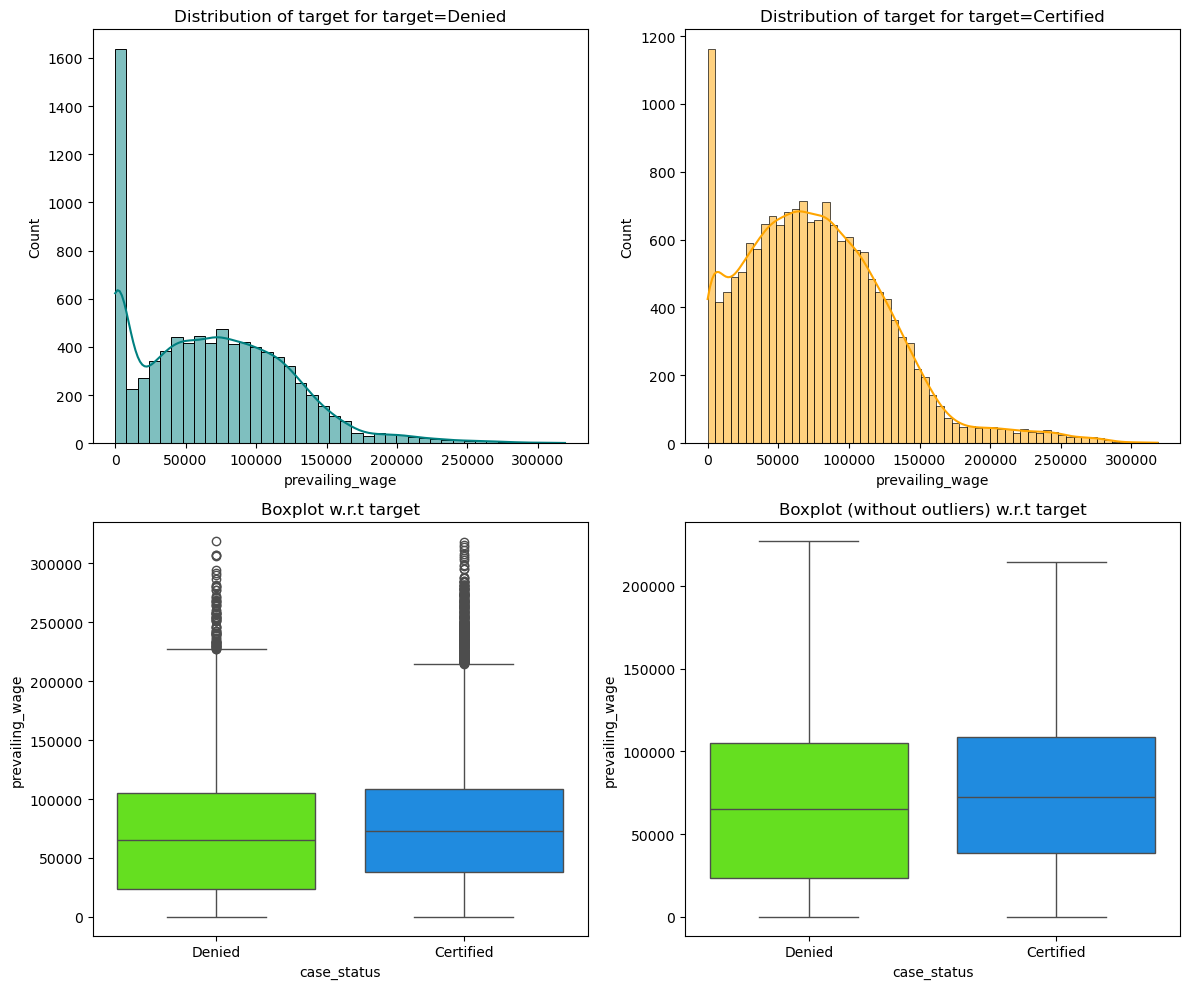

**Plotting for:** `no_of_employees`

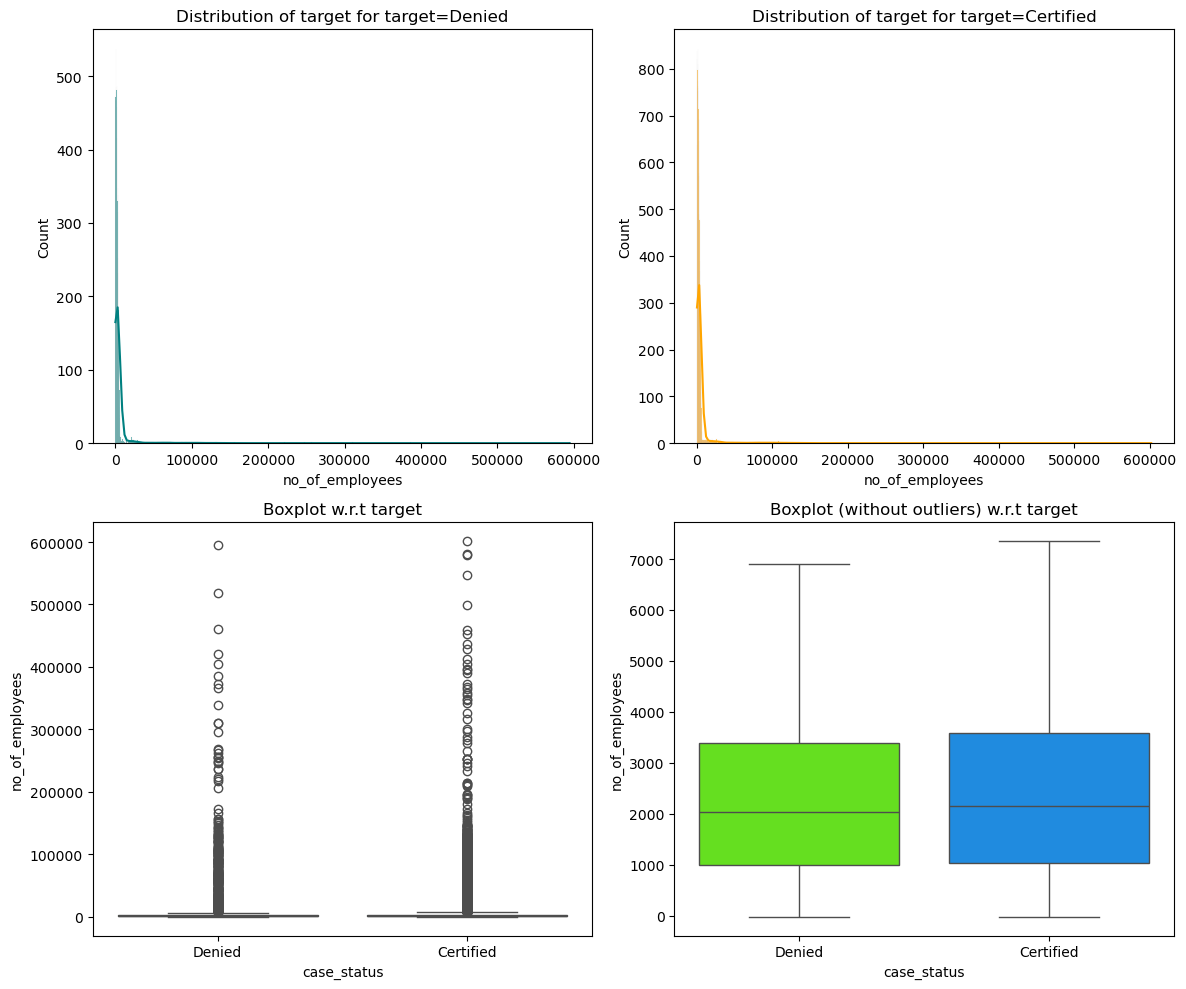

**Plotting for:** `yr_of_estab`

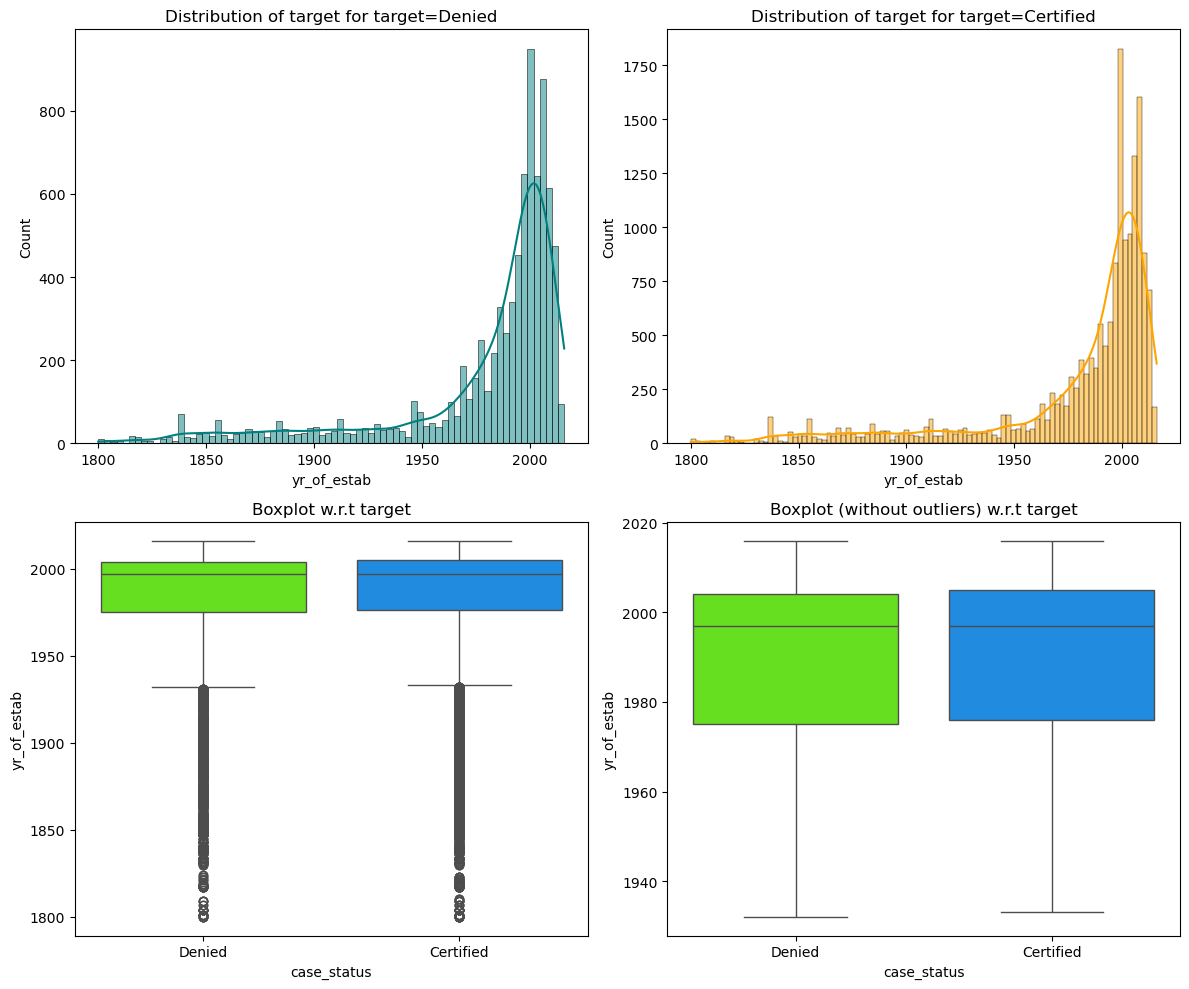

In [91]:
cols = [
        "prevailing_wage",
        "no_of_employees",
        "yr_of_estab",
        "case_status",
    ]

for col in cols:
    if col != "case_status":
        #print(f"\n Plotting for: {col}")
        display(Markdown(f"**Plotting for:** `{col}`"))
        distribution_plot_wrt_target(data, col, "case_status")

#### Observations for Bivariate Analysis - Numerical columns:

1. prevailing_wage Vs. case_status
   * Certified wage distribution appears to be better distributed than the Denied group.
   * Outliers noticed
   * Certified applications have a wider distribution than denied.
-----------------------------------------------------------------------------------------------------------------------     
2. no_of_employees Vs. case_status
   * Both Certified and Denied applications are highly concentrated in companies with fewer employees (< 50,000)
   * Presence of many outliers in both Certified and Denied cases.
   * The median number of employees is slightly higher for Certified applications.
-----------------------------------------------------------------------------------------------------------------------
3. yr_of_estab Vs. case_status
   * Certified applications tend to be from relatively newer companies
   * Outliers exist in both categories

#### Categorical Feature vs Target (case_status)

**Plotting for:** `education_of_employee`

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


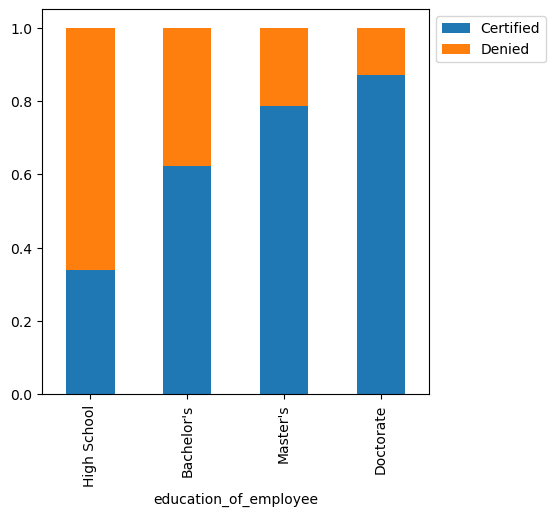

**Plotting for:** `has_job_experience`

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


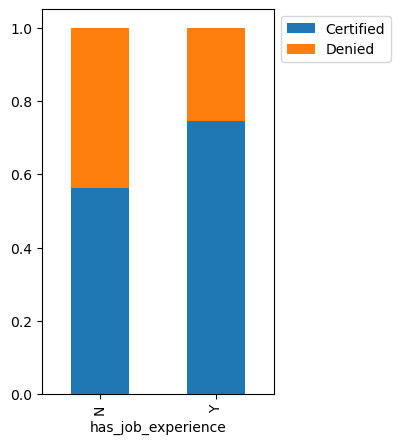

**Plotting for:** `requires_job_training`

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


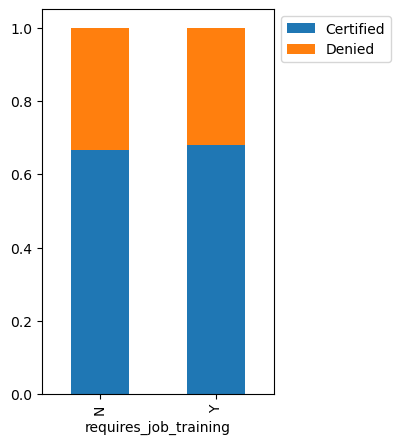

**Plotting for:** `full_time_position`

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


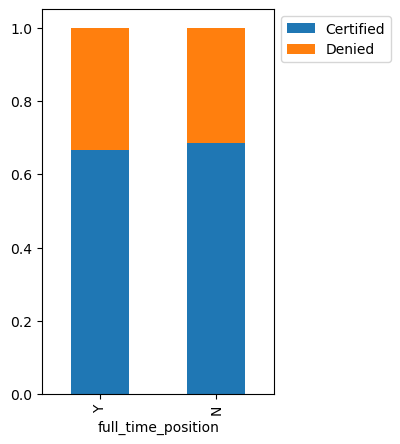

**Plotting for:** `region_of_employment`

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


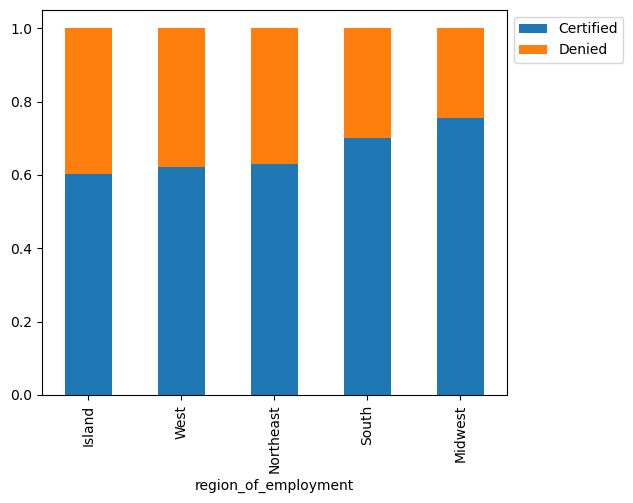

**Plotting for:** `continent`

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


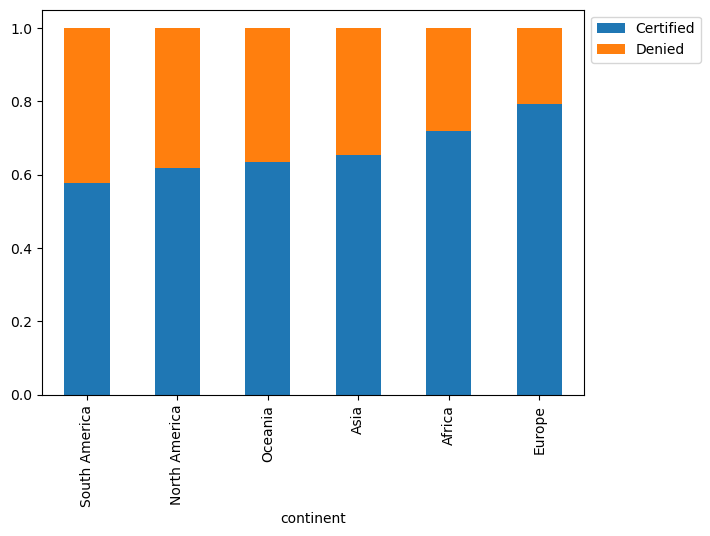

**Plotting for:** `unit_of_wage`

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


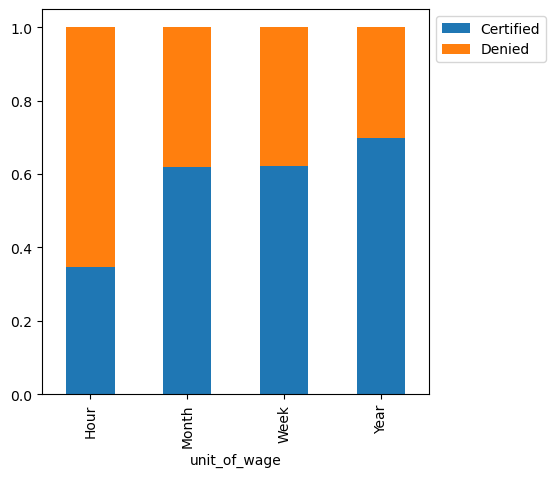

In [92]:
cols = [
        "education_of_employee",
        "has_job_experience",
        "requires_job_training",
        "full_time_position",
    	"region_of_employment",
		"continent",
        "unit_of_wage",
		"case_status",
    ]

for col in cols:
    if col != "case_status":
        #print(f"\n Plotting for: {col}")
        display(Markdown(f"**Plotting for:** `{col}`"))
        stacked_barplot(data, col, "case_status")

#### Observations for Bivariate Analysis - Categorical columns:

1. education_of_employee Vs. case_status :
   * Master's have the highest visa certified counts
   * Followed by Doctorate
   * Having a good education really helps in getting visa certified.
------------------------------------------------------------------------------------------------------------
2. has_job_experience Vs. case_status:
   * With job experience have better chance to get certified
   * Close to half of applicants with no job experience are getting denied
------------------------------------------------------------------------------------------------------------
3. requires_job_training Vs. case_status:
   * With and without job training does not greatly impact the certification rate.
   * requires_job_training is not a strong factor to influnce the model
------------------------------------------------------------------------------------------------------------
4. full_time_position Vs. case_status:
   * Minor difference observed in certification rate where applicants have full time position or not
   * Full time jobs have slightly higher rate of acceptance
   * full_time_position is not a strong factor to influnce the model
------------------------------------------------------------------------------------------------------------
5. region_of_employment Vs. case_status:
   * Midwest have highest certification rate
   * Followed by South region
   * Island have lowest certification rate
   * Regional policies and opportunities may impact this difference.
------------------------------------------------------------------------------------------------------------
6. continent Vs. case_status:
   * Europe has highest certifitication counts.
   * Followed by Africa
   * South America applicants are having the lowest approval rate.

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
region_of_employment                                                      
All                         10234       2192         3420      9634  25480
West                         2925        714          785      2162   6586
Northeast                    2874        656          905      2760   7195
South                        2991        541          934      2551   7017
Midwest                      1315        256          736      2000   4307
Island                        129         25           60       161    375
------------------------------------------------------------------------------------------------------------------------


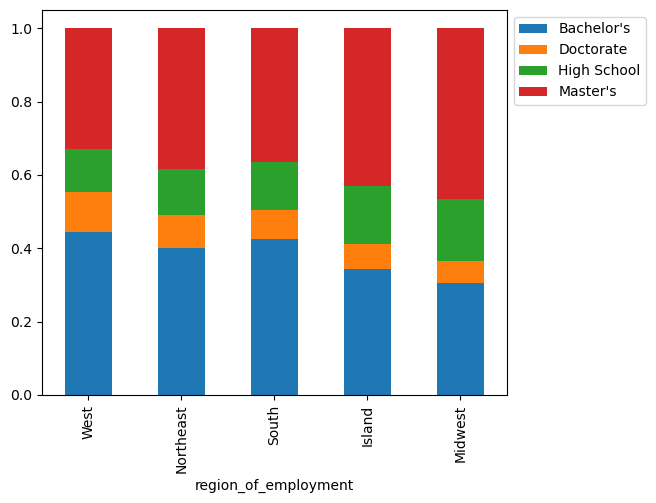

In [93]:
#Analysis for region_of_employment & education_of_employee
stacked_barplot(data, 'region_of_employment', 'education_of_employee')

#### Observations:
1. Master's and Bachelor's degree holders dominate in all regions
2. Northeast has most employment among others
3. Island has the least employment counts.

## Multivariate Analysis


### HeatMap to understand the correlation between the column data


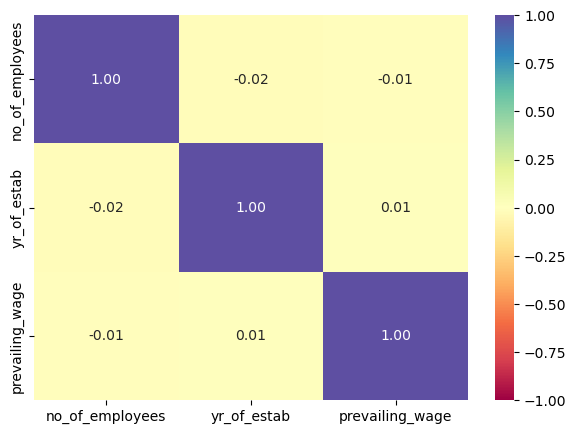

In [94]:
#Select all numeric data
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(7, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observation:
1. The numerical columns(no_of_employees,yr_of_estab,prevailing_wage) have almost zero correlation with eachother
2. The columns could be treated as independent features in modelling

case_status           Certified  Denied    All
education_experience                          
All                       17018    8462  25480
Bachelor's_N               2231    2117   4348
Bachelor's_Y               4136    1750   5886
Master's_N                 2567    1426   3993
High School_Y               722    1302   2024
High School_N               442     954   1396
Master's_Y                 5008     633   5641
Doctorate_N                 754     187    941
Doctorate_Y                1158      93   1251
------------------------------------------------------------------------------------------------------------------------


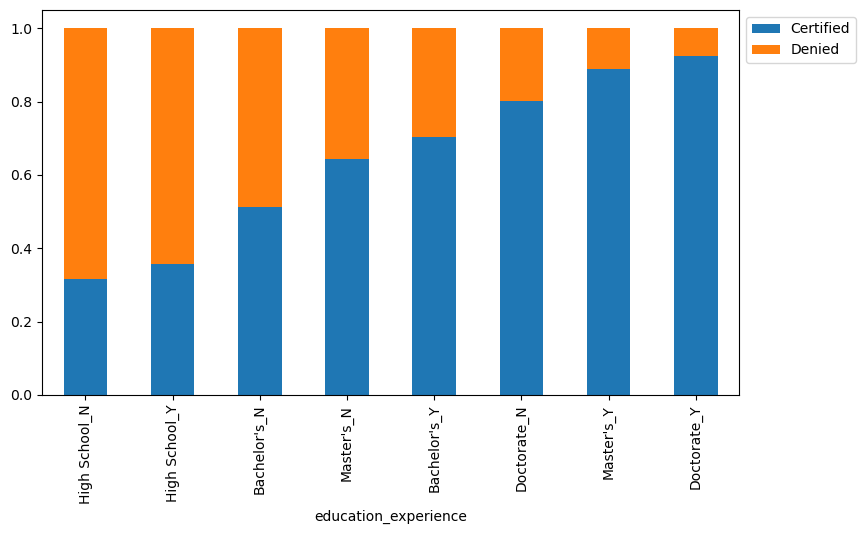

In [95]:
#Realtion between Education + Experience + Case status
data2 = data.copy()
data2['education_experience'] = data2['education_of_employee'] + '_' + data2['has_job_experience']
stacked_barplot(data2, predictor='education_experience', target='case_status')

#### Observation:
1. Doctorate and  Master's education having job experience show a very high visa certified status
2. Employees with only High school education face high rejection rate
3. In genreal a higher education with job expereince increases chance to get visa approved

case_status        Certified  Denied    All
fulltime_training                          
All                    17018    8462  25480
Y_N                    13176    6693  19869
Y_Y                     1987     917   2904
N_N                     1836     820   2656
N_Y                       19      32     51
------------------------------------------------------------------------------------------------------------------------


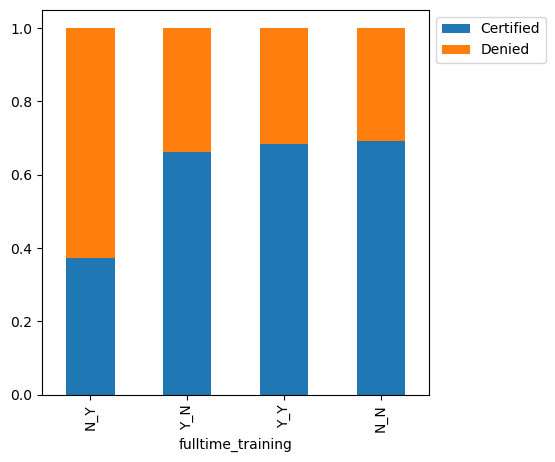

In [96]:
#Analysis of relation between Full-time + Training + Case status
data3 = data.copy()
data3['fulltime_training'] = data3['full_time_position'] + '_' + data3['requires_job_training']
stacked_barplot(data3, predictor='fulltime_training', target='case_status')

#### Observations:
1. Best approval chances are observed when the job is full-time(with or without job training requirement)
2. Worst-case scenario is part-time roles that require training(N_Y)
3. Part time job and no job training required(N_N) also have a high approval rate

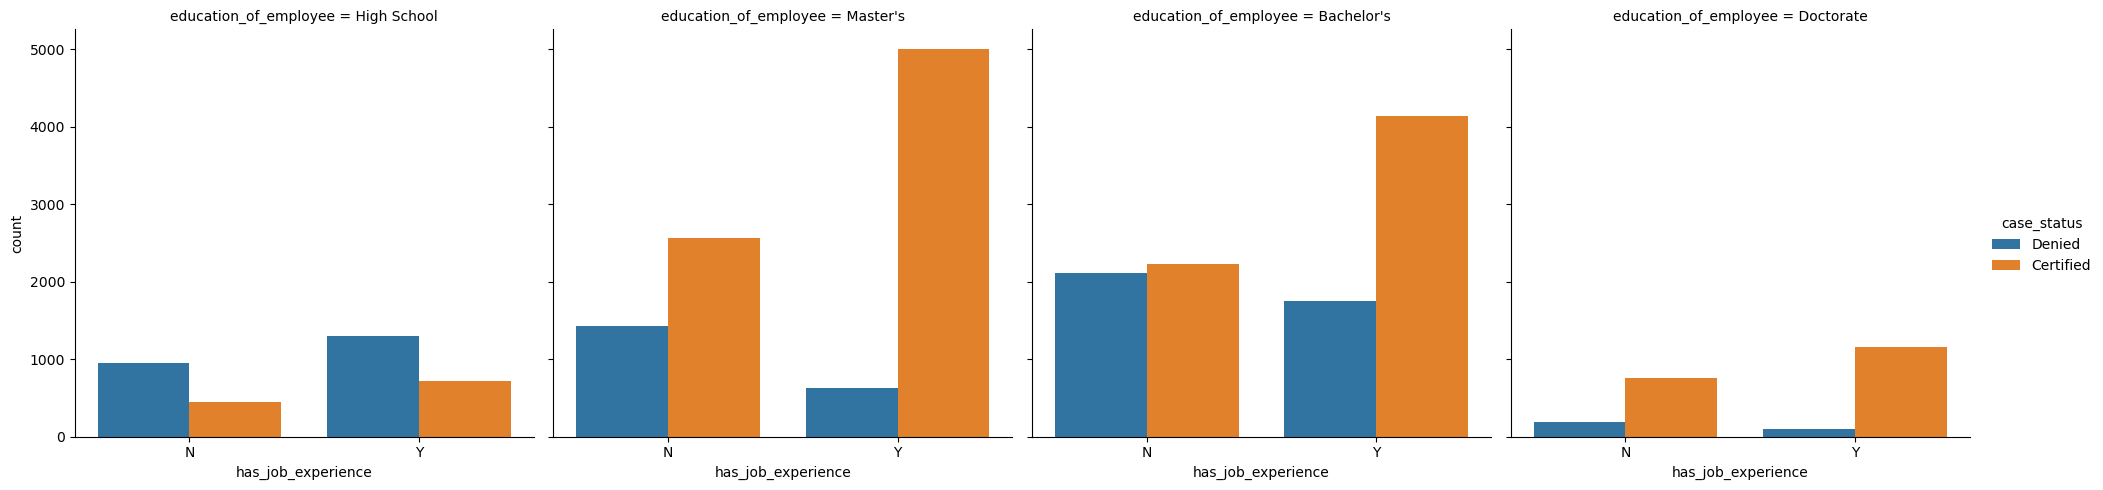

In [97]:
#Realtion between Education + Experience + Case status
sns.catplot(data=data, x='has_job_experience', kind='count', hue='case_status', col='education_of_employee',aspect=1)

#### Observations
1. Higher education leads to higher certification rate
2. Job expeience increases chances to get visa
3. Counts seem to be lesser for High school education
4. Employees with high education and with job experince tends to do well
5. Visa is denied less for doctorate employees.

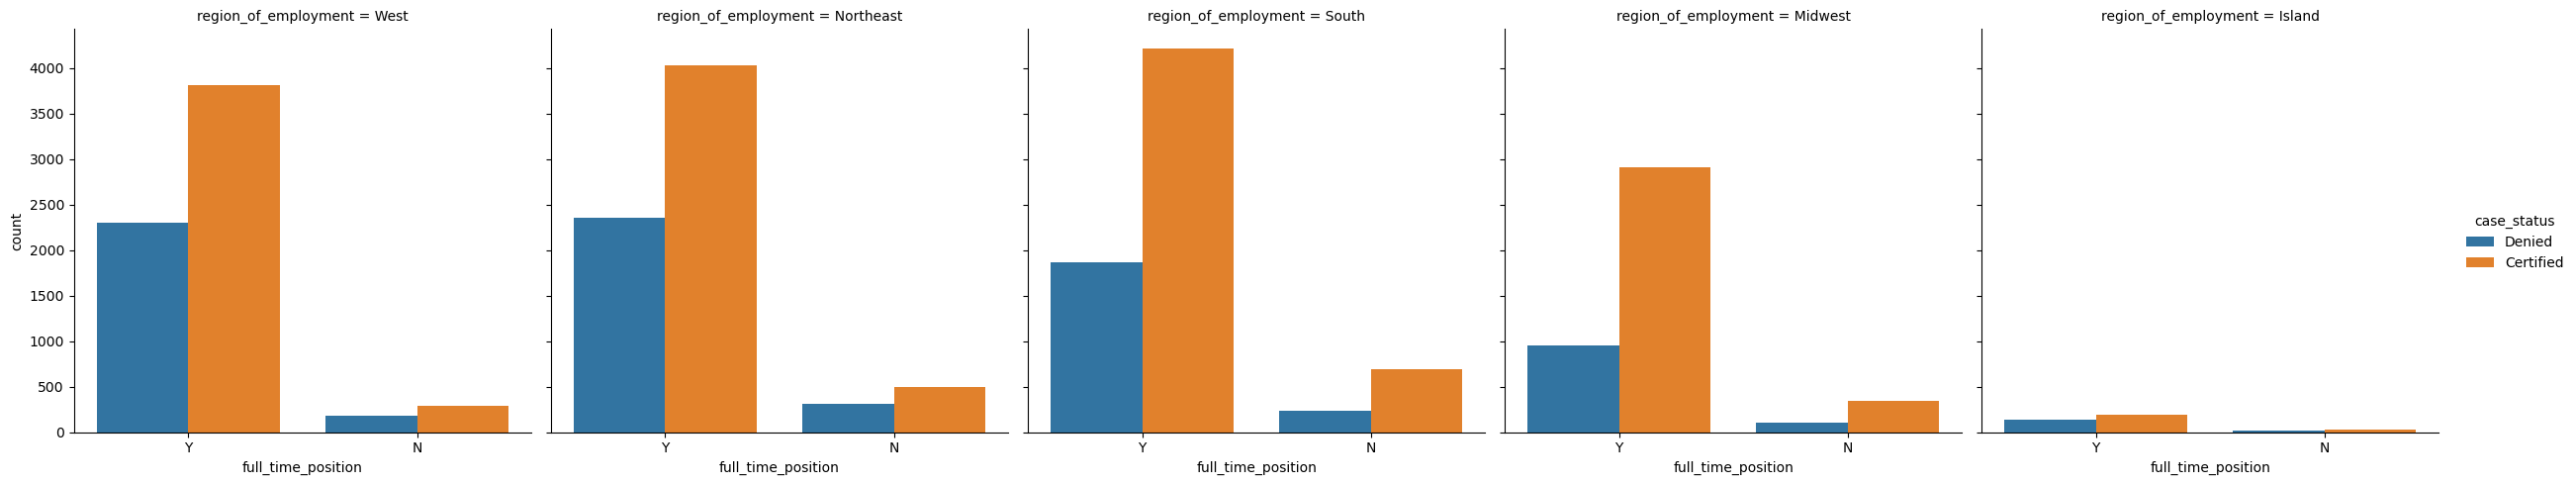

In [98]:
#Relation between full_time_position + region of employment + case_status
sns.catplot(data=data, x='full_time_position', hue='case_status',kind='count', col='region_of_employment',aspect=1)

#### Observations
1. Full time positions have higher approval rate for visa
2. South, Northeast and West have high full time position employees who got their visa certified
3. Island region has very less data 

### Data Preprocessing

### Handling -ve values in no_of_employees column

In [99]:
# Filter rows where no_of_employees is negative
negative_employees = data[data['no_of_employees'] < 0]

# Display the result
print(f"Total negative values: {negative_employees.shape[0]}")
negative_employees

Total negative values: 33


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.990,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.140,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.940,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.460,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.970,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.320,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.950,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.500,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.610,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.510,Year,Y,Certified


#### Observation:
* There are total 33 rows where customers have -ve value as experience 

#### To understand how the values are spread in the dataset for no_of_employees column, we are performing a check on no_of_employees 
##### Vs. yr_of_estab, 
##### Vs. prevailing_wage, 
##### Vs. full_time_position

In [100]:
#Compare no_of_employees < 0 with yr_of_estab 
data[data['no_of_employees'] < 0]['yr_of_estab'].describe()

count     33.000
mean    1991.303
std       20.598
min     1923.000
25%     1984.000
50%     1999.000
75%     2005.000
max     2014.000
Name: yr_of_estab, dtype: float64

In [101]:
#Compare no_of_employees > 0 with yr_of_estab 
data[data['no_of_employees'] > 0]['yr_of_estab'].describe()

count   25447.000
mean     1979.395
std        42.386
min      1800.000
25%      1976.000
50%      1997.000
75%      2005.000
max      2016.000
Name: yr_of_estab, dtype: float64

In [102]:
#Compare no_of_employees < 0 with prevailing_wage  
data[data['no_of_employees'] < 0]['prevailing_wage'].describe()

count       33.000
mean     64842.333
std      47513.249
min        103.970
25%      27599.350
50%      58488.500
75%     100463.580
max     167851.800
Name: prevailing_wage, dtype: float64

In [103]:
#Compare no_of_employees > 0 with prevailing_wage 
data[data['no_of_employees'] > 0]['prevailing_wage'].describe()

count    25447.000
mean     74468.281
std      52822.177
min          2.137
25%      34039.210
50%      70312.500
75%     107739.505
max     319210.270
Name: prevailing_wage, dtype: float64

In [104]:
#Compare no_of_employees < 0 with full_time_position   
data[data['no_of_employees'] < 0]['full_time_position'].describe()

count     33
unique     2
top        Y
freq      32
Name: full_time_position, dtype: object

In [105]:
#Compare no_of_employees > 0 with prevailing_wage 
data[data['no_of_employees'] > 0]['full_time_position'].describe()

count     25447
unique        2
top           Y
freq      22741
Name: full_time_position, dtype: object

#### Using median value to replace all negative values in no_of_employees column
#### Replacing the -ve values with the median is a better approach to avoid further skewed data

In [106]:
median_employees = data[data['no_of_employees'] >= 0]['no_of_employees'].median()
data.loc[data['no_of_employees'] < 0, 'no_of_employees'] = median_employees

In [107]:
#Get total total number of rows with negative Experience
data[data["no_of_employees"] < 0].value_counts().sum()

0

#### Observation:
* We notice that all 33 records having -ve values are replaced with median value

In [108]:
#value of median experience we are adding
median_employees

2112.0

#### Observation.
1. Based on the analysis of no_of_employees Vs. yr_of_estab, prevailing_wage, full_time_position there doesnt seem to be any pattern involved.
2. In reality this will never occur.
3. Therefore using the median value to replace all the -ve no_of_employees values.

### Outlier detection 

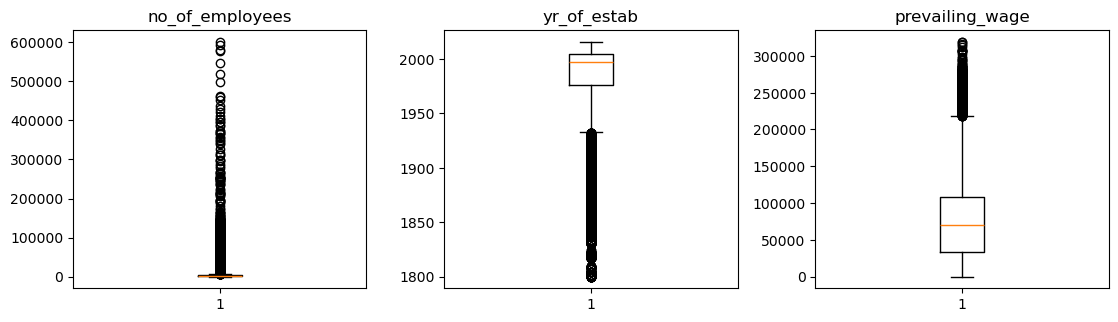

In [109]:
# outlier detection using boxplot. Getting all numerical cols
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations
1. There are quite a few outliers in the data.
2. However, we will not treat them as they are proper values

### Feature Engineering

#### Dropping the case_id with all unique values

In [110]:
data = data.drop(["case_id"], axis=1)
print(data.columns)

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


#### Observation 
1. As we have already observed that case_id is similar to index.
2. We notice that case_id column is deleted from dataset.

#### Convert Y/N Categorical Columns to Numeric (0/1)

In [111]:
# Ensure the columns are treated as strings
data['has_job_experience'] = data['has_job_experience'].astype(str)
data['requires_job_training'] = data['requires_job_training'].astype(str)
data['full_time_position'] = data['full_time_position'].astype(str)
data['case_status'] = data['case_status'].astype(str)

# Binary encoding for has_job_experience, requires_job_training, full_time_position
binary_values = {'Y': 1, 'N': 0}
data['has_job_experience'] = data['has_job_experience'].map(binary_values)
data['requires_job_training'] = data['requires_job_training'].map(binary_values)
data['full_time_position'] = data['full_time_position'].map(binary_values)

# Binary encoding for case_status. Converting Certified to 1 and Denied to 0
visa_values = {'Certified': 1, 'Denied': 0}
data['case_status'] = data['case_status'].map(visa_values)

# Display dataset
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,0,0,14513,2007,West,592.203,Hour,1,0
1,Asia,Master's,1,0,2412,2002,Northeast,83425.650,Year,1,1
2,Asia,Bachelor's,0,1,44444,2008,West,122996.860,Year,1,0
3,Asia,Bachelor's,0,0,98,1897,West,83434.030,Year,1,0
4,Africa,Master's,1,0,1082,2005,South,149907.390,Year,1,1


#### Observation 
1. We transformed columns has_job_experience, requires_job_training, full_time_position as a numeric binary inputs
2. We transformed column case_status as a numeric binary input for model prediction
3. This is required for better prediction of the ML model.

#### Apply log transformation to prevailing_wage & no_of_employees --> This reduces skewed data and reduces outlier impact

In [112]:
#Creating new columns log_wage & log_no_of_employees
data['log_wage'] = data['prevailing_wage'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['log_no_of_employees'] = data['no_of_employees'].apply(lambda x: np.log(x) if x > 0 else np.nan)

#Display datset
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,log_wage,log_no_of_employees
0,Asia,High School,0,0,14513,2007,West,592.203,Hour,1,0,6.384,9.583
1,Asia,Master's,1,0,2412,2002,Northeast,83425.650,Year,1,1,11.332,7.788
2,Asia,Bachelor's,0,1,44444,2008,West,122996.860,Year,1,0,11.720,10.702
3,Asia,Bachelor's,0,0,98,1897,West,83434.030,Year,1,0,11.332,4.585
4,Africa,Master's,1,0,1082,2005,South,149907.390,Year,1,1,11.918,6.987


#### Observations:
1. New columns log_wage and log_no_of_employees are created by applying the log() function
2. We have already observed that no null values are present in the dataset.
3. This is needed to handle skewed data, reduce outlier impact and improve model learning.

#### Calculate and create "company_age" column from yr_of_estab column

In [113]:
# Define the current year 
CURRENT_YEAR = 2025

# Create new column 'company_age'
data['company_age'] = CURRENT_YEAR - data['yr_of_estab']
data['company_age'] = data['company_age'].apply(lambda x: x if x >= 0 else np.nan)

#Display datset
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,log_wage,log_no_of_employees,company_age
0,Asia,High School,0,0,14513,2007,West,592.203,Hour,1,0,6.384,9.583,18
1,Asia,Master's,1,0,2412,2002,Northeast,83425.650,Year,1,1,11.332,7.788,23
2,Asia,Bachelor's,0,1,44444,2008,West,122996.860,Year,1,0,11.720,10.702,17
3,Asia,Bachelor's,0,0,98,1897,West,83434.030,Year,1,0,11.332,4.585,128
4,Africa,Master's,1,0,1082,2005,South,149907.390,Year,1,1,11.918,6.987,20


#### Observations:
1. New column "company_age" created

In [114]:
data['company_age'].describe()

count   25480.000
mean       45.590
std        42.367
min         9.000
25%        20.000
50%        28.000
75%        49.000
max       225.000
Name: company_age, dtype: float64

#### Observations:
1. Mean company_age is 45 years
2. Minimun is 9 years
3. Maximum is 225 years

In [115]:
#Dropping columns - prevailing_wage , no_of_employees and yr_of_estab as we no longer require these column data
data.drop(columns=['prevailing_wage','no_of_employees','yr_of_estab'], inplace=True)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  int64  
 3   requires_job_training  25480 non-null  int64  
 4   region_of_employment   25480 non-null  object 
 5   unit_of_wage           25480 non-null  object 
 6   full_time_position     25480 non-null  int64  
 7   case_status            25480 non-null  int64  
 8   log_wage               25480 non-null  float64
 9   log_no_of_employees    25480 non-null  float64
 10  company_age            25480 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 2.1+ MB


#### Observation :
1. prevailing_wage , no_of_employees and yr_of_estab columns are dropped
2. has_job_experience, requires_job_training, full_time_position and case_status are converted to int type
3. log_wage and log_no_of_employees are of float type

In [117]:
data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
region_of_employment     0
unit_of_wage             0
full_time_position       0
case_status              0
log_wage                 0
log_no_of_employees      0
company_age              0
dtype: int64

#### Observations:
* No null values found

## <a name='link2'>Exploratory Data Analysis (EDA) Summary - for new columns created</a>

**Plotting for:** `log_wage`

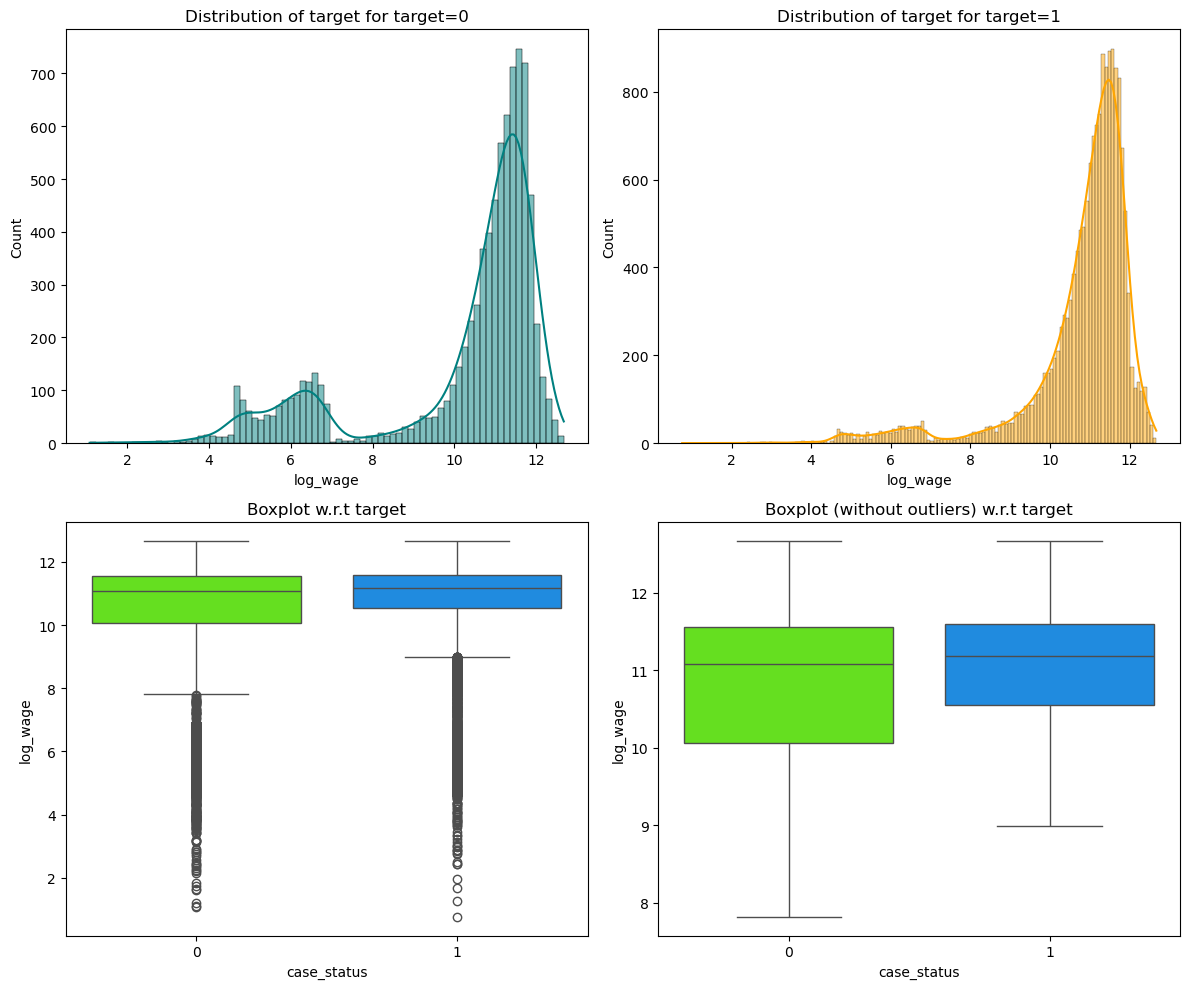

**Plotting for:** `log_no_of_employees`

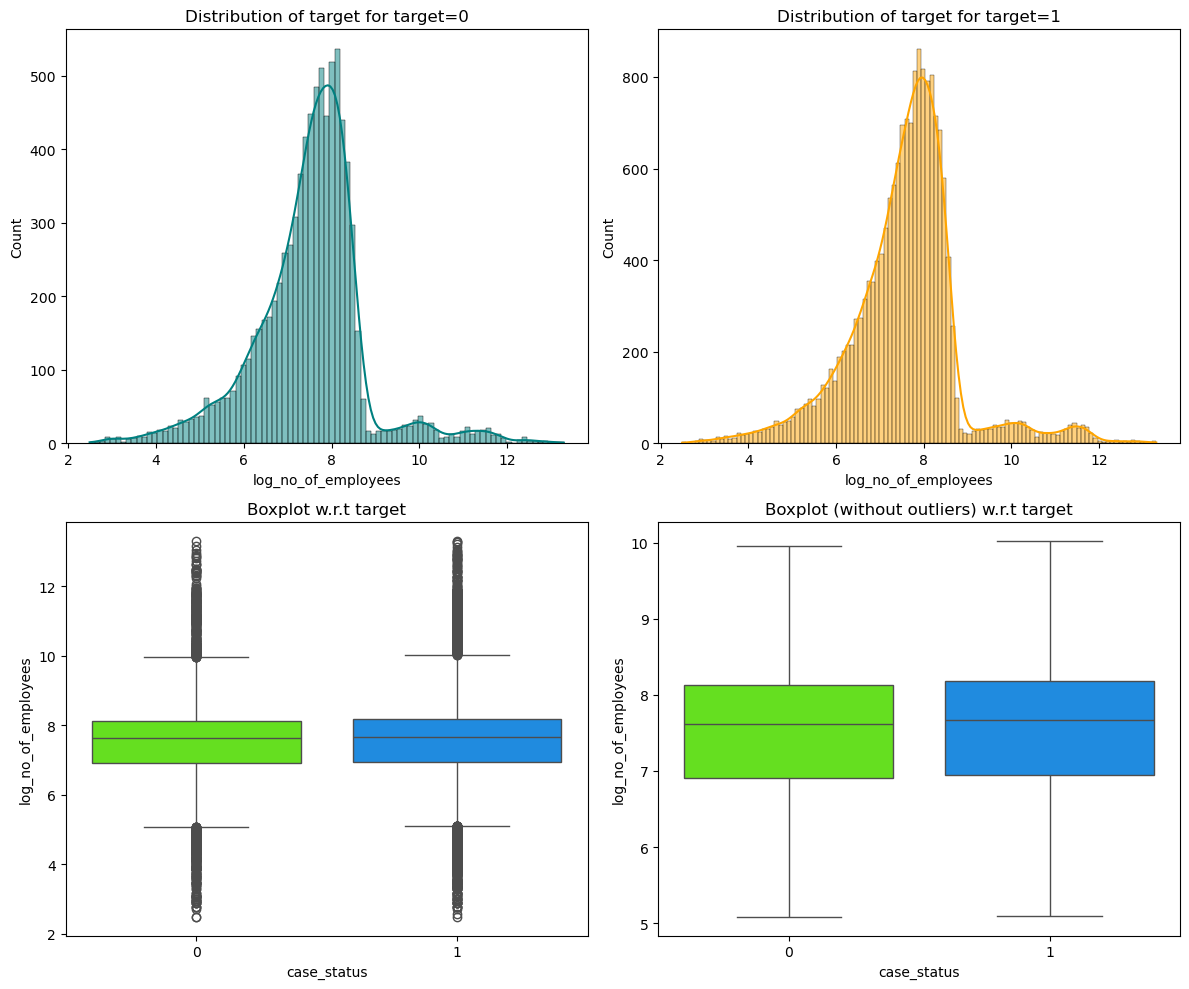

**Plotting for:** `company_age`

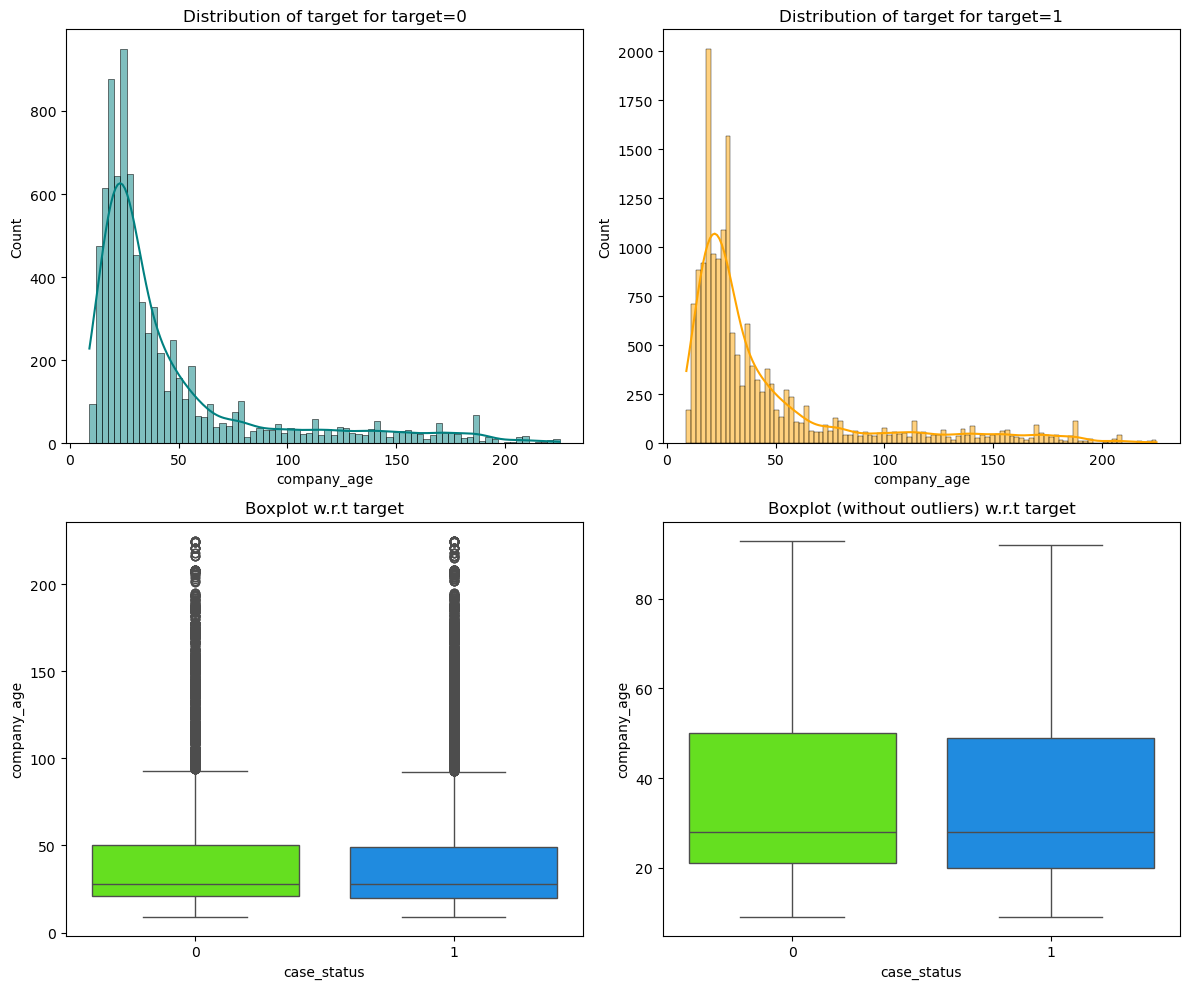

In [118]:
cols = [
        "log_wage",
        "log_no_of_employees",
        "company_age",
        "case_status",
    ]

for col in cols:
    if col != "case_status":
        #print(f"\n Plotting for: {col}")
        display(Markdown(f"**Plotting for:** `{col}`"))
        distribution_plot_wrt_target(data, col, "case_status")

#### Observations:

After log transformation we notice:
* Distribution became more symmetric and bell shaped.
* Extreme values are brough closer.
* Outliers are still present

-------------------------------------------------------------------------------
1. log_wage Vs. case_status:
   * Distribution is right skewed with peak at 11.
   * Outliers noticed
   * Higher wages tend to have better rate of approval.
-------------------------------------------------------------------------------
2. log_no_of_employees Vs. case_status:
   * Almost same kind of distribution and medians.
   * No noticable difference
-------------------------------------------------------------------------------
3. company_age Vs. case_status
   * Distribution right skewed
   * Outliers noticed.

### Data Preparataion for model building

In [119]:
print(data.columns)

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status', 'log_wage', 'log_no_of_employees',
       'company_age'],
      dtype='object')


#### We are splitting dataset into Train, Validation and Test set to prevent data leakage and overfitting on Test data

In [120]:
# Separate features and target
X = data.drop(["case_status"], axis=1)
y = data["case_status"]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)

# Step 1: Split into training set (60%) and temp set (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.40, random_state=1, stratify=y)

# Step 2: Split temp into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=1, stratify=y_temp)

In [121]:
print("Shape of Training set     :", X_train.shape)
print("Shape of Validation set   :", X_val.shape)
print("Shape of Test set         :", X_test.shape)

print("\nPercentage of classes in Training set:")
print(y_train.value_counts(normalize=True))

print("\nPercentage of classes in Validation set:")
print(y_val.value_counts(normalize=True))

print("\nPercentage of classes in Test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set     : (15288, 21)
Shape of Validation set   : (5096, 21)
Shape of Test set         : (5096, 21)

Percentage of classes in Training set:
case_status
1   0.668
0   0.332
Name: proportion, dtype: float64

Percentage of classes in Validation set:
case_status
1   0.668
0   0.332
Name: proportion, dtype: float64

Percentage of classes in Test set:
case_status
1   0.668
0   0.332
Name: proportion, dtype: float64


* We had seen that around 66.8% of observations belongs to class 1 (certified) and 33.2% observations belongs to class 0 (Denied), and this is preserved in the Train, Validation and test sets

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
- Model predicts Denied, but in reality the applicant should be Certified - False Negative (FN)
- Model predicts Certified, but the applicant should be Denied - False Positive (FP)


**Which case is more important?**
- Both FP and FN are equally important, because:
  * False Positive (FP): Certifying an unqualified applicant could lead to compliance, legal, or security risks.
  * False Negative (FN): Denying a qualified applicant could lead to missed opportunities, reputational damage, and applicant dissatisfaction.  

**How to reduce the losses?**
- The company should aim to balance Precision and Recall.
- The best metric in this case is the F1-score
- A high F1-score ensures that:
  * The model correctly identifies as many Certified and Denied cases as possible.

In [122]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [123]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Initial Model Building

### Model Building - with Original Data

In [124]:
# List of all models
models = [
    ("Decision Tree", DecisionTreeClassifier(random_state=1, class_weight='balanced')),
    ("Random Forest", RandomForestClassifier(random_state=1, class_weight='balanced')),
    ("Bagging Classifier", BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)),
    ("AdaBoost Classifier", AdaBoostClassifier(random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=1)),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1))
]

# Train all models once and store
trained_models = []

# Dictionary to store F1-scores
f1_scores = {}

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    trained_models.append((name, model))

    pred_train = model.predict(X_train)
    acc = accuracy_score(y_train, pred_train)
    prec = precision_score(y_train, pred_train)
    rec = recall_score(y_train, pred_train)
    f1 = f1_score(y_train, pred_train)
    #Print all scores in a well formatted row
    print(f"{name:<20} | Acc: {acc:.3f} | Prec: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")

print("\nValidation Performance:\n")
for name, model in trained_models:
    pred_val = model.predict(X_val)
    acc = accuracy_score(y_val, pred_val)
    prec = precision_score(y_val, pred_val)
    rec = recall_score(y_val, pred_val)
    f1 = f1_score(y_val, pred_val)

    f1_scores[name] = f1
    
    #Print all scores in a well formatted row
    print(f"{name:<20} | Acc: {acc:.3f} | Prec: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")


Training Performance:

Decision Tree        | Acc: 1.000 | Prec: 1.000 | Recall: 1.000 | F1: 1.000
Random Forest        | Acc: 1.000 | Prec: 1.000 | Recall: 1.000 | F1: 1.000
Bagging Classifier   | Acc: 0.984 | Prec: 0.989 | Recall: 0.986 | F1: 0.988
AdaBoost Classifier  | Acc: 0.741 | Prec: 0.762 | Recall: 0.890 | F1: 0.821
Gradient Boosting    | Acc: 0.760 | Prec: 0.783 | Recall: 0.886 | F1: 0.832
XGBoost              | Acc: 0.853 | Prec: 0.855 | Recall: 0.940 | F1: 0.895

Validation Performance:

Decision Tree        | Acc: 0.663 | Prec: 0.748 | Recall: 0.747 | F1: 0.748
Random Forest        | Acc: 0.728 | Prec: 0.768 | Recall: 0.848 | F1: 0.806
Bagging Classifier   | Acc: 0.698 | Prec: 0.772 | Recall: 0.778 | F1: 0.775
AdaBoost Classifier  | Acc: 0.737 | Prec: 0.760 | Recall: 0.885 | F1: 0.818
Gradient Boosting    | Acc: 0.749 | Prec: 0.776 | Recall: 0.879 | F1: 0.824
XGBoost              | Acc: 0.738 | Prec: 0.774 | Recall: 0.857 | F1: 0.814


#### Observations:
1. Decision Tree, Random Forest and Bagging models seem to overfit.
2. Gradient Boosting, Adaboost and XGBoost seem to perform well without getting overfitted
3. F1 scores are good for Gradient, Adaboost and XGBoost Classifier models

## Oversampling

### Oversampling data using SMOTE (Synthetic Minority Oversampling Technique)

In [125]:
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)  
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [126]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10211
Before Oversampling, counts of label 'No': 5077 

After Oversampling, counts of label 'Yes': 10211
After Oversampling, counts of label 'No': 10211 

After Oversampling, the shape of train_X: (20422, 21)
After Oversampling, the shape of train_y: (20422,) 



### Model Building - with Oversampled Data

In [127]:
# List of all models
models = [
    ("Decision Tree", DecisionTreeClassifier(random_state=1, class_weight='balanced')),
    ("Random Forest", RandomForestClassifier(random_state=1, class_weight='balanced')),
    ("Bagging Classifier", BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)),
    ("AdaBoost Classifier", AdaBoostClassifier(random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=1)),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1))
]

# Train all models once and store
trained_models = []

# Dictionary to store F1-scores
f1_scores_over = {}

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    trained_models.append((name, model))

    pred_train = model.predict(X_train_over)
    acc = accuracy_score(y_train_over, pred_train)
    prec = precision_score(y_train_over, pred_train)
    rec = recall_score(y_train_over, pred_train)
    f1 = f1_score(y_train_over, pred_train)
    #Print all scores in a well formatted row
    print(f"{name:<20} | Acc: {acc:.3f} | Prec: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")

print("\nValidation Performance:\n")
for name, model in trained_models:
    pred_val = model.predict(X_val)
    acc = accuracy_score(y_val, pred_val)
    prec = precision_score(y_val, pred_val)
    rec = recall_score(y_val, pred_val)
    f1 = f1_score(y_val, pred_val)

    f1_scores_over[name] = f1
    
    #Print all scores in a well formatted row
    print(f"{name:<20} | Acc: {acc:.3f} | Prec: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")


Training Performance:

Decision Tree        | Acc: 1.000 | Prec: 1.000 | Recall: 1.000 | F1: 1.000
Random Forest        | Acc: 1.000 | Prec: 1.000 | Recall: 1.000 | F1: 1.000
Bagging Classifier   | Acc: 0.987 | Prec: 0.992 | Recall: 0.983 | F1: 0.987
AdaBoost Classifier  | Acc: 0.767 | Prec: 0.741 | Recall: 0.820 | F1: 0.779
Gradient Boosting    | Acc: 0.794 | Prec: 0.779 | Recall: 0.821 | F1: 0.799
XGBoost              | Acc: 0.871 | Prec: 0.852 | Recall: 0.899 | F1: 0.875

Validation Performance:

Decision Tree        | Acc: 0.656 | Prec: 0.751 | Recall: 0.726 | F1: 0.738
Random Forest        | Acc: 0.722 | Prec: 0.783 | Recall: 0.808 | F1: 0.795
Bagging Classifier   | Acc: 0.692 | Prec: 0.785 | Recall: 0.741 | F1: 0.762
AdaBoost Classifier  | Acc: 0.734 | Prec: 0.791 | Recall: 0.819 | F1: 0.805
Gradient Boosting    | Acc: 0.745 | Prec: 0.804 | Recall: 0.817 | F1: 0.810
XGBoost              | Acc: 0.726 | Prec: 0.784 | Recall: 0.814 | F1: 0.799


#### Observations:
1. Decision Tree, Random Forest and Bagging models seem to overfit.
2. Gradient Boosting, Adaboost and XGBoost seem to perform well without getting overfitted
3. Gradient Boosting achieves the highest F1 on validation data.
4. Boosting models (GB, Ada, XGB) show strong, balanced performance

# Undersampling 

### Undersampling data using Random Undersampler

In [128]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [129]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10211
Before Under Sampling, counts of label 'No': 5077 

After Under Sampling, counts of label 'Yes': 5077
After Under Sampling, counts of label 'No': 5077 

After Under Sampling, the shape of train_X: (10154, 21)
After Under Sampling, the shape of train_y: (10154,) 



### Model Building - with Undersampled Data

In [130]:
# List of all models
models = [
    ("Decision Tree", DecisionTreeClassifier(random_state=1, class_weight='balanced')),
    ("Random Forest", RandomForestClassifier(random_state=1, class_weight='balanced')),
    ("Bagging Classifier", BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)),
    ("AdaBoost Classifier", AdaBoostClassifier(random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=1)),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1))
]

# Train all models once and store
trained_models = []

# Dictionary to store F1-scores
f1_scores_un = {}

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    trained_models.append((name, model))

    pred_train = model.predict(X_train_un)
    acc = accuracy_score(y_train_un, pred_train)
    prec = precision_score(y_train_un, pred_train)
    rec = recall_score(y_train_un, pred_train)
    f1 = f1_score(y_train_un, pred_train)
    #Print all scores in a well formatted row
    print(f"{name:<20} | Acc: {acc:.3f} | Prec: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")

print("\nValidation Performance:\n")
for name, model in trained_models:
    pred_val = model.predict(X_val)
    acc = accuracy_score(y_val, pred_val)
    prec = precision_score(y_val, pred_val)
    rec = recall_score(y_val, pred_val)
    f1 = f1_score(y_val, pred_val)
    f1_scores_un[name] = f1

    #Print all scores in a well formatted row
    print(f"{name:<20} | Acc: {acc:.3f} | Prec: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")


Training Performance:

Decision Tree        | Acc: 1.000 | Prec: 1.000 | Recall: 1.000 | F1: 1.000
Random Forest        | Acc: 1.000 | Prec: 1.000 | Recall: 1.000 | F1: 1.000
Bagging Classifier   | Acc: 0.979 | Prec: 0.993 | Recall: 0.964 | F1: 0.979
AdaBoost Classifier  | Acc: 0.703 | Prec: 0.697 | Recall: 0.719 | F1: 0.708
Gradient Boosting    | Acc: 0.727 | Prec: 0.725 | Recall: 0.731 | F1: 0.728
XGBoost              | Acc: 0.873 | Prec: 0.872 | Recall: 0.873 | F1: 0.873

Validation Performance:

Decision Tree        | Acc: 0.620 | Prec: 0.764 | Recall: 0.623 | F1: 0.687
Random Forest        | Acc: 0.679 | Prec: 0.813 | Recall: 0.674 | F1: 0.737
Bagging Classifier   | Acc: 0.642 | Prec: 0.813 | Recall: 0.602 | F1: 0.692
AdaBoost Classifier  | Acc: 0.696 | Prec: 0.816 | Recall: 0.704 | F1: 0.756
Gradient Boosting    | Acc: 0.711 | Prec: 0.827 | Recall: 0.716 | F1: 0.768
XGBoost              | Acc: 0.683 | Prec: 0.816 | Recall: 0.679 | F1: 0.741


#### Observations:
1. Overfitting is observed in Decision Tree, Random Forest, and Bagging Classifier
2. Boosting models (AdaBoost, Gradient Boosting, XGBoost) show better generalization, especially Gradient Boosting and AdaBoost.
3. Gradient Boosting has the highest F1 score (0.768) in validation set

### Comparing F1 score of validation set for all 18 models created
#### 6 models with Original data + 6 models with Oversampled data + 6 models with Undersampled data

In [131]:
# Create DataFrame
f1_comparison = pd.DataFrame({
    "Model": f1_scores_over.keys(),
    "Original F1":list(f1_scores.values()),  
    "Oversampled F1": list(f1_scores_over.values()),
    "Undersampled F1": list(f1_scores_un.values())
})
#Print F1 scores in a well formatted table
print(f1_comparison.to_markdown(index=False))  

| Model               |   Original F1 |   Oversampled F1 |   Undersampled F1 |
|:--------------------|--------------:|-----------------:|------------------:|
| Decision Tree       |      0.747721 |         0.738163 |          0.68663  |
| Random Forest       |      0.806258 |         0.795432 |          0.737147 |
| Bagging Classifier  |      0.774996 |         0.76225  |          0.691879 |
| AdaBoost Classifier |      0.817923 |         0.804734 |          0.755913 |
| Gradient Boosting   |      0.824129 |         0.810322 |          0.767607 |
| XGBoost             |      0.813833 |         0.798673 |          0.741382 |


### Observations:
Based on Model Evaluation Criterion,
1. Oversampling data helped but didn’t surpass the original data in most cases.
2. Undersampling clearly led to weaker F1-scores.
3. Models with original data offer the best balance of precision and recall, minimizing FP and FN risk.
4. Among the 18 models we created, below the top 3 best performing models :
  #### 1. Gradient Boosting - with original data (F1 score = 0.824129)
  #### 2. AdaBoost Classifier - with original data (F1 score = 0.817923)
  #### 3. XGBoost Classifier - with original data (F1 score = 0.813833)	

## HyperParamenter Tuning using RandomizedSearchCV

### Tuning GradientBoostingClassifier with original data

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters (Gradient Boosting): {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Train Performance:
    Accuracy  Recall  Precision    F1
0     0.761   0.881      0.787 0.831
Validation Performance:
    Accuracy  Recall  Precision    F1
0     0.747   0.873      0.776 0.822


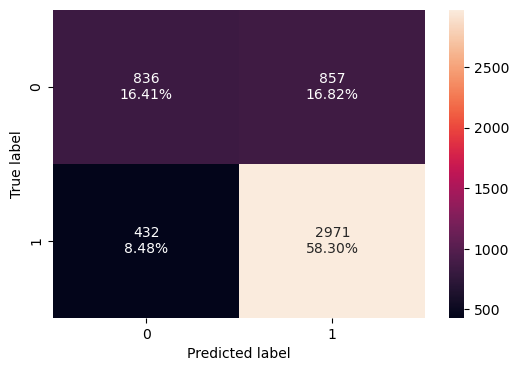

In [132]:
gbc_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

gbc = GradientBoostingClassifier(random_state=1)

gbc_search = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=gbc_param_grid,
    scoring='f1',
    cv=5,
    n_iter=10,
    n_jobs=-1,
    random_state=1,
    verbose=1
)

gbc_search.fit(X_train, y_train)
best_gbc = gbc_search.best_estimator_

print("Best Parameters (Gradient Boosting):", gbc_search.best_params_)

# Training and validation performance
gbc_train_perf = model_performance_classification_sklearn(best_gbc, X_train, y_train)
gbc_val_perf = model_performance_classification_sklearn(best_gbc, X_val, y_val)

print("Train Performance:\n", gbc_train_perf)
print("Validation Performance:\n", gbc_val_perf)

confusion_matrix_sklearn(best_gbc, X_val, y_val)

#### Observations:
1. Best Parameters: subsample=0.8, n_estimators=100, max_depth=3, learning_rate=0.12. Very small gap between train and validation F1 score(0.831 vs 0.822).3. Balanced performance across accuracy, recall, and precision.
4. 
High recall (0.873)-→ very good at capturing positive cases.


### Tuning AdaBoostClassifier with original data

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters (AdaBoost): {'n_estimators': 150, 'learning_rate': 0.1}
Train Performance:
    Accuracy  Recall  Precision    F1
0     0.738   0.899      0.756 0.821
Validation Performance:
    Accuracy  Recall  Precision    F1
0     0.734   0.895      0.753 0.818


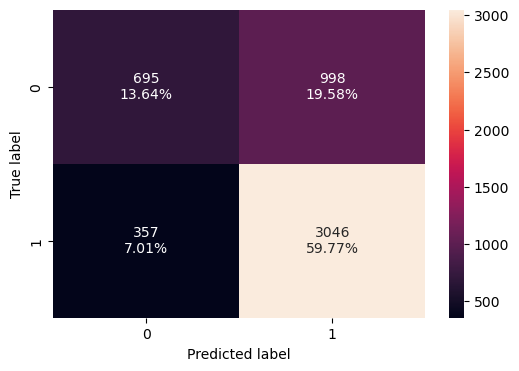

In [133]:
ab_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]
}

ab = AdaBoostClassifier(random_state=1)

ab_search = RandomizedSearchCV(
    estimator=ab,
    param_distributions=ab_param_grid,
    scoring='f1',
    cv=5,
    n_iter=10,
    n_jobs=-1,
    random_state=1,
    verbose=1
)

ab_search.fit(X_train, y_train)
best_ab = ab_search.best_estimator_

print("Best Parameters (AdaBoost):", ab_search.best_params_)

ab_train_perf = model_performance_classification_sklearn(best_ab, X_train, y_train)
ab_val_perf = model_performance_classification_sklearn(best_ab, X_val, y_val)

print("Train Performance:\n", ab_train_perf)
print("Validation Performance:\n", ab_val_perf)

confusion_matrix_sklearn(best_ab, X_val, y_val)


#### Observations:
1. Best Parameters: n_estimators=150, learning_rate=0.1
2. Highest recall on validation (0.895), even better than Gradient Boosting.
3. F1 score slightly lower than Tuned Gradient boosting.

### Tuning XGBClassifier with original data

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters (XGBoost): {'subsample': 1.0, 'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Train Performance:
    Accuracy  Recall  Precision    F1
0     0.767   0.931      0.769 0.842
Validation Performance:
    Accuracy  Recall  Precision    F1
0     0.736   0.912      0.748 0.822


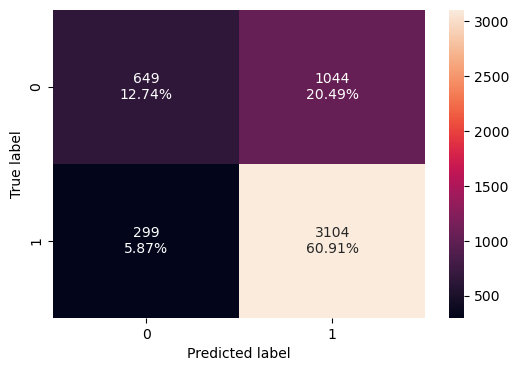

In [134]:
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1)

xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_grid,
    scoring='f1',
    cv=5,
    n_iter=15,
    n_jobs=-1,
    random_state=1,
    verbose=1
)

xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

print("Best Parameters (XGBoost):", xgb_search.best_params_)

xgb_train_perf = model_performance_classification_sklearn(best_xgb, X_train, y_train)
xgb_val_perf = model_performance_classification_sklearn(best_xgb, X_val, y_val)

print("Train Performance:\n", xgb_train_perf)
print("Validation Performance:\n", xgb_val_perf)

confusion_matrix_sklearn(best_xgb, X_val, y_val)


#### Observations:
1. Best Parameters: subsample=1.0, n_estimators=150, max_depth=7, learning_rate=0.01, colsample_bytree=0.82. Small gap between train and validation F1 score (0.842 vs. 0.822).3. 
Highest recall on train and alvidation sel (0.931 and 0.91)


## Tuned Models Comparison

In [135]:
# Training performance comparison

models_tuned_train_comp_df = pd.concat(
#original data
    [gbc_train_perf.T,
	ab_train_perf.T,	
	xgb_train_perf.T],
    axis=1,
)
models_tuned_train_comp_df.columns = [
#original data
	"Gradient Boosting Tuned",
   	"AdaBoost Classifier Tuned",
	"XGBoost Classifier Tuned"]
print("Comparison showing the performance of the tuned models :")
print("Training performance comparison:")
models_tuned_train_comp_df

Comparison showing the performance of the tuned models :
Training performance comparison:


,Gradient Boosting Tuned,AdaBoost Classifier Tuned,XGBoost Classifier Tuned
Accuracy,0.761,0.738,0.767
Recall,0.881,0.899,0.931
Precision,0.787,0.756,0.769
F1,0.831,0.821,0.842


In [136]:
# Validation set performance comparison

models_tuned_train_comp_df = pd.concat(
#original data
    [gbc_val_perf.T,
	ab_val_perf.T,	
	xgb_val_perf.T],
    axis=1,
)
models_tuned_train_comp_df.columns = [
#original data
	"Gradient Boosting Tuned",
   	"AdaBoost Classifier Tuned",
	"XGBoost Classifier Tuned"]
print("Comparison showing the performance of the tuned models :")
print("Validation set performance comparison:")
models_tuned_train_comp_df

Comparison showing the performance of the tuned models :
Validation set performance comparison:


,Gradient Boosting Tuned,AdaBoost Classifier Tuned,XGBoost Classifier Tuned
Accuracy,0.747,0.734,0.736
Recall,0.873,0.895,0.912
Precision,0.776,0.753,0.748
F1,0.822,0.818,0.822


## Final Model Selection

To provide accurate predictions of customers who will get their visa certified, we recommend the -
#### XGBoost Classifier Tuned model

Reason:
1. F1-score (0.822)  --> Highest F1 score. Which means it best balances precision and recall.
2. Recall score (0.912) --> Highest recalls score. Important because missing a true “Certified” applicant (FN) is costly.
3. Precision score (0.748) --> Strong Precision. which helps reduce False Positives (wrongly certifying unqualified applicants).
4. Accuracy score(0.736)  --> Acceptable score. As accuracy is a secondary metric for our use case. 

### Evaluate the chosen model's performance on TEST set
#### XGBoost Classifier Tuned model

Test Performance of Tuned XGBoost Classifier:
   Accuracy  Recall  Precision    F1
0     0.735   0.912      0.747 0.821


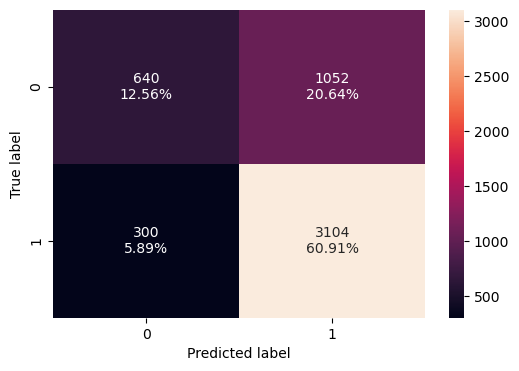

In [137]:
xgb_test_perf = model_performance_classification_sklearn(best_xgb, X_test, y_test)
print("Test Performance of Tuned XGBoost Classifier:")
print(xgb_test_perf)

# Plot confusion matrix
confusion_matrix_sklearn(best_xgb, X_test, y_test)

#### Observations:

1. Model performing almost similar to that of validation set(As expected).
2. Best overall model with the highest F1 score, Recall score.
3. Strong precision and an acceptable accuracy scores. 
4. This is very close to the ideal model based on Model Evaluation Criterion. 
5. This model best aligns with our business objective of high F1-score.

### Feature Importance for XGBoost Classifier Tuned model

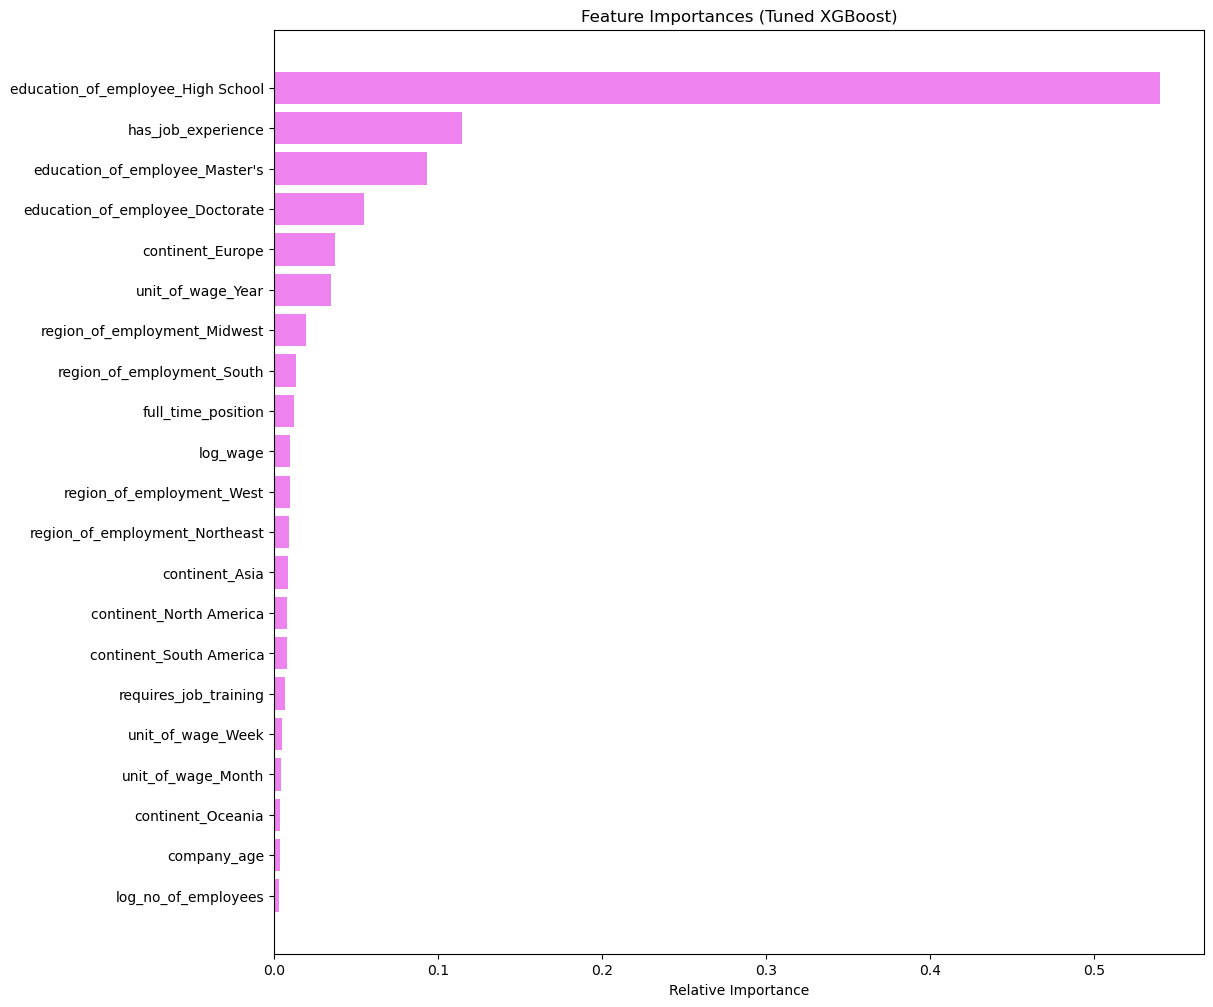

In [138]:
feature_names = X_train.columns
importances = best_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances (Tuned XGBoost)")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Conclusion :

Among all the models created, tuned and performance evaluated, we conclude that the XGBoost Classifier Tuned model with orignal data has the best performance and therefor we are choosing this as the best model for our prediction. Below are the resons why:

1. F1-score (0.821)  --> High F1 score. Which means it provides a good balance between precision and recall.
2. Recall score (0.912) --> High recall score. Important because missing a true 'Certified' applicant (FN) is costly.
3. Precision score (0.747) --> Strong Precision. Which helps reduce False Positives (wrongly certify unqualified applicants).
4. Accuracy score(0.735)  --> Acceptable score. As accuracy is a secondary metric for our use case. 

### Key Drivers:
#### Top Positive Predictors:
1. education_of_employee_Doctorate
2. education_of_employee_Master's
3. has_job_experience 

#### What NOT to focus:
1. Candidates who require job training as this could lower the job readiness or skill mismatch.
2. Candidates who have wage paid on a weekly basis. This could suggest less secure roles, which could affect approval.

#### Top Red Flag:
1. education_of_employee_High School (Most dominant feature in our model. As per EDA High school education has most visa denied cases. Therefore considering this feature as top red flag)

### Actionable Insights & Key Takeaways: ##### 1. Education:
   * Education is the strongest predictor.
   * The most important feature by far is education_of_employee_High School
   * Visa approval models favor applicants with advanced degrees Doctorate/Master’s degree.
   * Applications with only high school education should be reviewed further.     

##### 2. Job experience:
   * Focus on candidates with verified job experience.
   * Applications missing this field or marked as “no experience” should be reviewed further.     

##### 3. Wage unit and location:
   * Unit of Wage (Year), Continent (Europe) and Region of Employment (Midwest) show reasonable influence.

### Business Recommendations:
##### 1. Fast track approval process for candidates with: 
   - Doctorate/Master's educational qualification
   - Verified job experience
   - Annual wage structure- Yearly     

##### 2. Perform detailed reviews for profiles with:
   - High school only educational level
   - No job experience     
  
##### 3. Ensure No Bias:
   - Model appears to show higher approval rates for European candidates.
   - This could mean higher eligible and qualified candidates from this region.
   - Or, It could show unintentional bias based on historical decision making.     

##### 4. Obtain model feedback:
   - Obtain periodic feedback on approved/denied cases post-decision to retrain and improve model accuracy over time.